## Moving Average Filter



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

frameSize = 2048

def movingAverage(x, M):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        sum = 0.0
        for k in range(0, M):
            sum += x[n-k]
        y[n] = sum / M
    return y

length = 200;
array = np.linspace(-np.pi, np.pi, length)
signal = np.sin(1.3*array+1.2) + 0.7 * np.sin(2.4*array+2.3) + 0.6 * np.sin(5.7*array+4.3)
noise = np.random.rand(length) * 0.4
noisySignal = signal + noise

@widgets.interact(M=widgets.IntSlider(min=1, max=30, step=1, value=10))
def execute(M=10): 
    plt.plot(noisySignal, 'b-', label='original')
    plt.plot(movingAverage(noisySignal, M), 'r-', label='averaged')
    plt.xlabel('Sample count')
    plt.ylabel('Amplitude')
    plt.title("Impulse signal (Time domain)")
    plt.legend(loc="lower right")
    plt.show

interactive(children=(IntSlider(value=10, description='M', max=30, min=1), Output()), _dom_classes=('widget-in…

<function matplotlib.pyplot.show(close=None, block=None)>

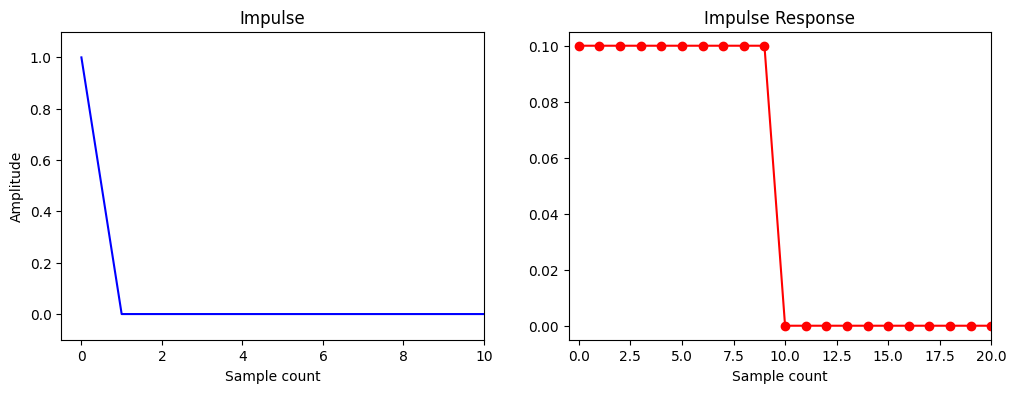

In [30]:
impulse = np.zeros(frameSize)
impulse[0] = 1;

impulseResponse = movingAverage(impulse, 10)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(impulse, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.5, 10)
ax.set_title("Impulse")

ax = axes[1]
ax.plot(impulseResponse, 'ro-')
ax.set_xlabel('Sample count')
#ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-0.5, 20)
ax.set_title("Impulse Response")

plt.show

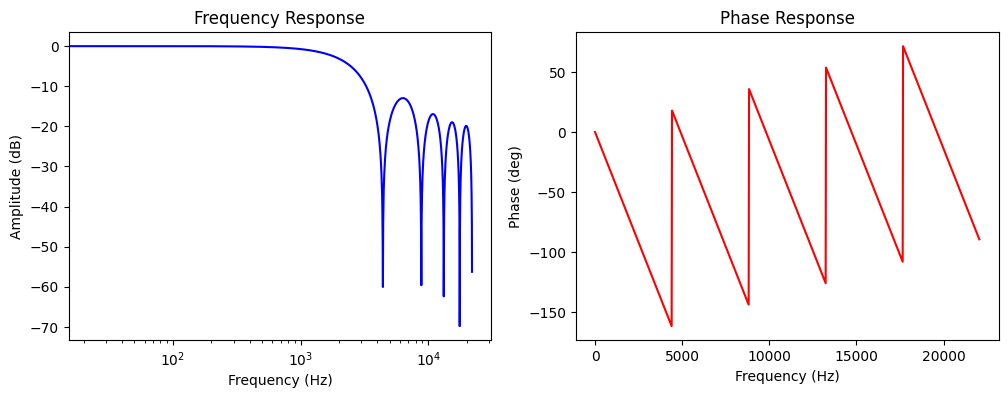

In [32]:
from scipy.fftpack import fft

sampleRate = 44100
spectrum = fft(impulseResponse)

x = np.linspace(0, spectrum.size * sampleRate / frameSize / 2 , spectrum.size//2)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
with np.errstate(divide='ignore'):
    y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]
    
ax.plot(x, y, 'b')
ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.degrees(np.angle(spectrum))[:spectrum.size//2]
ax.plot(x, y, 'r')
#ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (deg)')
ax.set_title("Phase Response")

plt.show()